In [1]:
# Define the path to the sample data file:

SAMPLE_DATA_FILE_PATH: str = "20250803_GI5539.csv"

In [2]:
# Import modules:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the sample data:

sample_data_df: pd.DataFrame = pd.read_csv(
    SAMPLE_DATA_FILE_PATH,
    sep=",",
    dtype={"illuminance_lux": float, "resistance_ohm": float},
)
sample_data_df.sort_values(by="illuminance_lux", inplace=True)

sample_data_df.describe()

,resistance_ohm,illuminance_lux
count,22.000000,22.000000
mean,11523.181818,345.850000
std,14421.043614,307.411859
min,2460.000000,9.400000
25%,4022.500000,115.450000
50%,5495.000000,258.000000
75%,8795.000000,547.000000
max,55000.000000,966.000000


In [4]:
# Calculate the logarithm of the data:

sample_data_df["log_resistance_ohm"] = np.log(sample_data_df["resistance_ohm"])
sample_data_df["log_illuminance_lux"] = np.log(sample_data_df["illuminance_lux"])
sample_data_df.head()

,resistance_ohm,illuminance_lux,log_resistance_ohm,log_illuminance_lux
0,55000.0,9.4,10.915088,2.240710
1,47990.0,11.3,10.778748,2.424803
2,24400.0,28.3,10.102338,3.342862
3,23100.0,31.6,10.047588,3.453157
4,18800.0,41.8,9.841612,3.732896


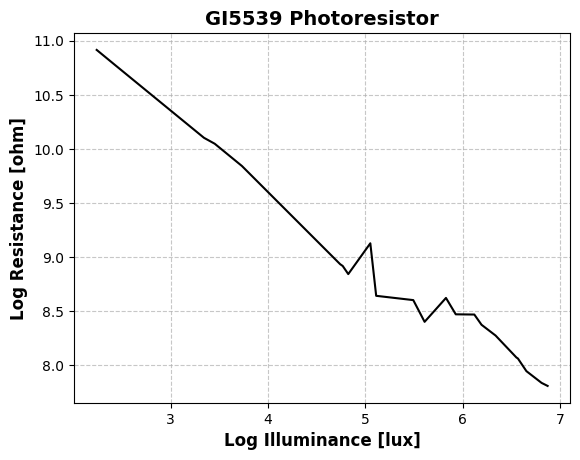

In [5]:
# Plot the raw data:

plt.plot(
    sample_data_df["log_illuminance_lux"],
    sample_data_df["log_resistance_ohm"],
    color="black",
)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Log Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Log Resistance [ohm]", fontsize=12, color="black", fontweight="bold")
plt.title("GI5539 Photoresistor", fontsize=14, color="black", fontweight="bold")
plt.show()

In [6]:
# Linear regression: Calculate the slope and intercept:

gamma, log_r0 = np.polyfit(
    sample_data_df["log_illuminance_lux"], sample_data_df["log_resistance_ohm"], 1
)
r0 = np.exp(log_r0)

print(f"Gamma: {gamma}")
print(f"R0: {r0}")

Gamma: -0.6410881977123006
R0: 200501.74243688726


In [7]:
# Define the photoresistor function:


def teorical_resistance(lux: float) -> float:
    """
    Calculate the resistance of a photoresistor from teorical curve.

    Args:
        lux: The illuminance in lux.

    Returns:
        The resistance in ohms.
    """

    return r0 * (lux**gamma)

In [8]:
# Compute the calculated resistance:

sample_data_df["calculated_resistance_ohm"] = sample_data_df["illuminance_lux"].apply(
    lambda x: teorical_resistance(x)
)
sample_data_df["log_calculated_resistance_ohm"] = np.log(
    sample_data_df["calculated_resistance_ohm"]
)
sample_data_df.head()

,resistance_ohm,illuminance_lux,log_resistance_ohm,log_illuminance_lux,calculated_resistance_ohm,log_calculated_resistance_ohm
0,55000.0,9.4,10.915088,2.240710,47671.341055,10.772086
1,47990.0,11.3,10.778748,2.424803,42364.490703,10.654066
2,24400.0,28.3,10.102338,3.342862,23517.708431,10.065509
3,23100.0,31.6,10.047588,3.453157,21912.224169,9.994800
4,18800.0,41.8,9.841612,3.732896,18314.757408,9.815462


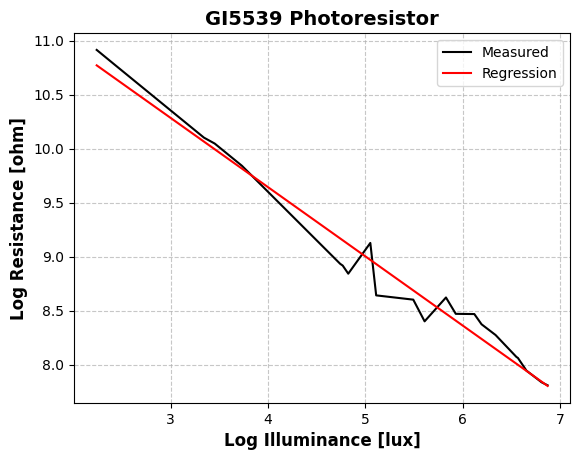

In [9]:
# Compare the calculated resistance with the measured resistance: Logarithmic values

plt.plot(
    sample_data_df["log_illuminance_lux"],
    sample_data_df["log_resistance_ohm"],
    color="black",
    label="Measured",
)
plt.plot(
    sample_data_df["log_illuminance_lux"],
    sample_data_df["log_calculated_resistance_ohm"],
    color="red",
    label="Regression",
)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Log Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Log Resistance [ohm]", fontsize=12, color="black", fontweight="bold")
plt.title("GI5539 Photoresistor", fontsize=14, color="black", fontweight="bold")
plt.legend()
plt.show()

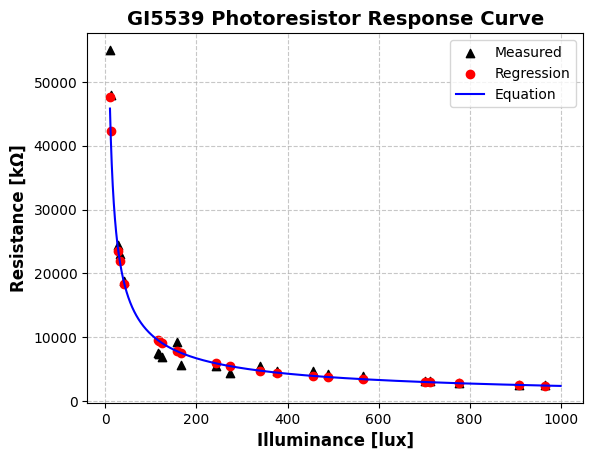

In [10]:
# Compare the calculated resistance with the measured resistance

illuminance_lux = np.arange(10, 1000, 0.1)
resistance_ohm = [teorical_resistance(x) for x in illuminance_lux]

plt.scatter(
    sample_data_df["illuminance_lux"],
    sample_data_df["resistance_ohm"],
    color="black",
    label="Measured",
    marker="^",  # Triangle marker
)
plt.scatter(
    sample_data_df["illuminance_lux"],
    sample_data_df["calculated_resistance_ohm"],
    color="red",
    label="Regression",
)
plt.plot(illuminance_lux, resistance_ohm, color="blue", label="Equation")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Resistance [kΩ]", fontsize=12, color="black", fontweight="bold")
plt.title(
    "GI5539 Photoresistor Response Curve", fontsize=14, color="black", fontweight="bold"
)
plt.legend()
plt.show()

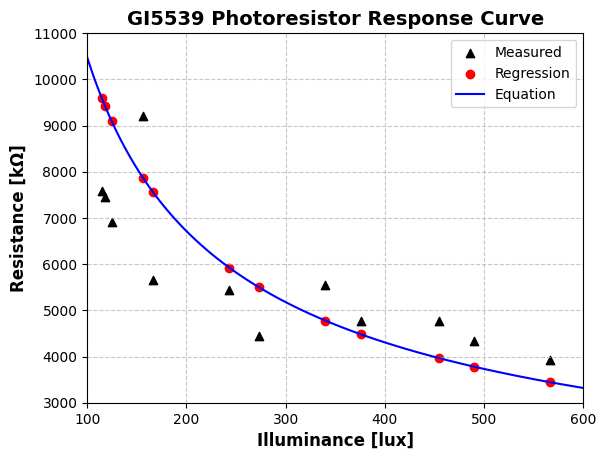

In [11]:
# Plot resistance vs illuminance between 100 and 600 lux

illuminance_lux = np.arange(100, 600, 0.1)
resistance_ohm = [teorical_resistance(x) for x in illuminance_lux]

plt.scatter(
    sample_data_df["illuminance_lux"],
    sample_data_df["resistance_ohm"],
    color="black",
    label="Measured",
    marker="^",  # Triangle marker
)
plt.scatter(
    sample_data_df["illuminance_lux"],
    sample_data_df["calculated_resistance_ohm"],
    color="red",
    label="Regression",
)
plt.plot(illuminance_lux, resistance_ohm, color="blue", label="Equation")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlim(100, 600)
plt.ylim(3000, 11000)
plt.xlabel("Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Resistance [kΩ]", fontsize=12, color="black", fontweight="bold")
plt.title(
    "GI5539 Photoresistor Response Curve", fontsize=14, color="black", fontweight="bold"
)
plt.legend()
plt.show()

In [12]:
# Desing the voltage divider:

supplied_voltage = 3.3  # ESP32

reference_illuminance = 350
reference_voltage = 1.7
reference_resistance = teorical_resistance(reference_illuminance)
print(f"Reference resistance: {reference_resistance} ohm")
print(f"Reference voltage: {reference_voltage} V")
print(f"Reference illuminance: {reference_illuminance} lux")

teorical_fixed_divider_resistance = (
    reference_resistance * reference_voltage / (supplied_voltage - reference_voltage)
)
print(f"Teorical fixed divider resistance: {teorical_fixed_divider_resistance} ohm")

fixed_divider_resistance = 5000  # 10k ohm
print(f"Fixed divider resistance: {fixed_divider_resistance} ohm")

Reference resistance: 4689.711791387551 ohm
Reference voltage: 1.7 V
Reference illuminance: 350 lux
Teorical fixed divider resistance: 4982.818778349273 ohm
Fixed divider resistance: 5000 ohm


In [13]:
# definition of voltage divider function:


def voltage_divider_output(r1: float) -> float:
    """
    Calculate the output voltage of a voltage divider.

    Args:
        r1: The resistance of the first resistor.

    Returns:
        The output voltage.
    """

    return supplied_voltage * fixed_divider_resistance / (r1 + fixed_divider_resistance)

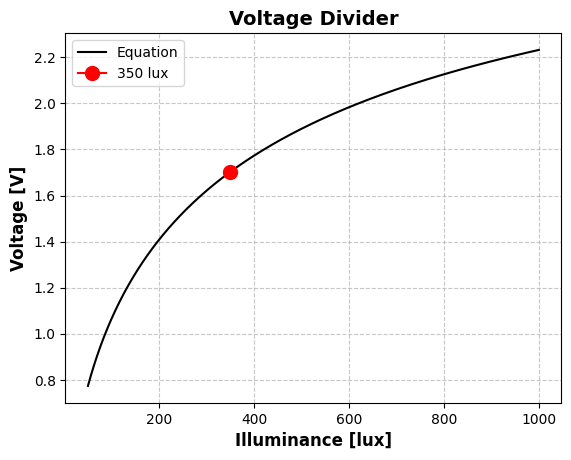

In [14]:
# Plot the voltage vs illuminance in voltage divider

illuminance_lux = np.arange(50, 1000, 0.1)
resistance_ohm = [teorical_resistance(x) for x in illuminance_lux]
voltage_v = [voltage_divider_output(r) for r in resistance_ohm]

plt.plot(illuminance_lux, voltage_v, color="black", label="Equation")
plt.plot(
    reference_illuminance,
    reference_voltage,
    marker="o",
    color="red",
    markersize=10,
    label=f"{reference_illuminance} lux",
)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Voltage [V]", fontsize=12, color="black", fontweight="bold")
plt.title("Voltage Divider", fontsize=14, color="black", fontweight="bold")
plt.legend()
plt.show()